<a href="https://colab.research.google.com/github/Pratikshya49/Ai-Final-/blob/main/2507009_PratikshyaBasnet_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Energy Consumption - Regression Analysis
## Final Portfolio Project - Regression Task

**Student Name:** [Pratikshya Basnet]  
**Student ID:** [2507009]  
**Date:** February 2026  
**Course:** 5CS037 - Concepts and Technologies of AI

---

## UN SDG Alignment
- **SDG 7:** Affordable and Clean Energy
- **SDG 13:** Climate Action

## 1. Import Libraries

In [ ]:
# Simple imports - only what we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print(" Libraries imported!")

 Libraries imported!


## 2. Load Data

In [ ]:
# Load dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("global_energy_consumption.csv", encoding ='latin1')

print("Dataset loaded!")
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")


Saving global_energy_consumption.csv to global_energy_consumption.csv
Dataset loaded!
Rows: 10,000, Columns: 10


### Preview Data

In [ ]:
# First 10 rows
print("First 10 rows:")
df.head(10)

First 10 rows:


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48
5,UK,2016,4682.02,2491.92,40.47,69.06,20.07,23.39,2242.11,0.35
6,India,2024,9893.64,3912.56,27.07,31.70,57.59,18.56,3626.50,0.13
7,Canada,2008,7719.04,35819.59,15.03,62.73,57.93,21.51,3808.66,0.05
8,Russia,2020,9624.55,1708.80,77.36,63.39,48.42,24.01,525.95,0.20
9,Brazil,2008,7818.38,29198.37,79.59,25.95,36.93,27.93,2504.76,0.11


In [ ]:
# Dataset info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 non-null  float64
 7   Household Energy Use (%)         10000 non-null  float64
 8   Carbon Emissions (Million Tons)  10000 non-null  float64
 9   Energy Price Index (USD/kWh)     10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB


### Column Descriptions

| Column | Description |
|--------|-------------|
| Country | Country name |
| Year | Year |
| Total Energy Consumption (TWh) | Total energy used |
| Per Capita Energy Use (kWh) | Energy per person |
| Renewable Energy Share (%) | % renewable |
| Fossil Fuel Dependency (%) | % fossil fuel |
| Industrial Energy Use (%) | % industry use |
| Household Energy Use (%) | % household use |
| **Carbon Emissions (Million Tons)** | **TARGET** |
| Energy Price Index (USD/kWh) | Price index |

## 3. Data Quality Check

In [ ]:
# Missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
dtype: int64


In [ ]:
# Duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [ ]:
# Unique countries
print(f"Number of countries: {df['Country'].nunique()}")
print(f"Years: {df['Year'].min()} - {df['Year'].max()}")

Number of countries: 10
Years: 2000 - 2024


## 4. Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2012.151400,5142.564425,25039.950516,47.322925,44.932851,40.057585,25.043290,2536.148007,0.273466
std,7.155236,2848.754040,14205.659284,24.603767,20.202800,11.538756,8.597024,1424.105067,0.130782
min,2000.000000,100.480000,500.270000,5.000000,10.010000,20.000000,10.000000,50.640000,0.050000
25%,2006.000000,2713.882500,12683.220000,26.110000,27.337500,30.217500,17.610000,1293.330000,0.160000
50%,2012.000000,5190.850000,25098.770000,47.150000,45.110000,39.980000,25.090000,2568.015000,0.270000
75%,2018.000000,7579.977500,37113.282500,68.682500,62.430000,50.150000,32.570000,3766.182500,0.390000
max,2024.000000,9999.260000,49989.570000,90.000000,80.000000,60.000000,40.000000,4999.340000,0.500000


### Target Variable Analysis

In [ ]:
# Target variable stats
target = 'Carbon Emissions (Million Tons)'

print(f"Target: {target}")
print(f"Mean: {df[target].mean():.2f}")
print(f"Median: {df[target].median():.2f}")
print(f"Std: {df[target].std():.2f}")

Target: Carbon Emissions (Million Tons)
Mean: 2536.15
Median: 2568.01
Std: 1424.11


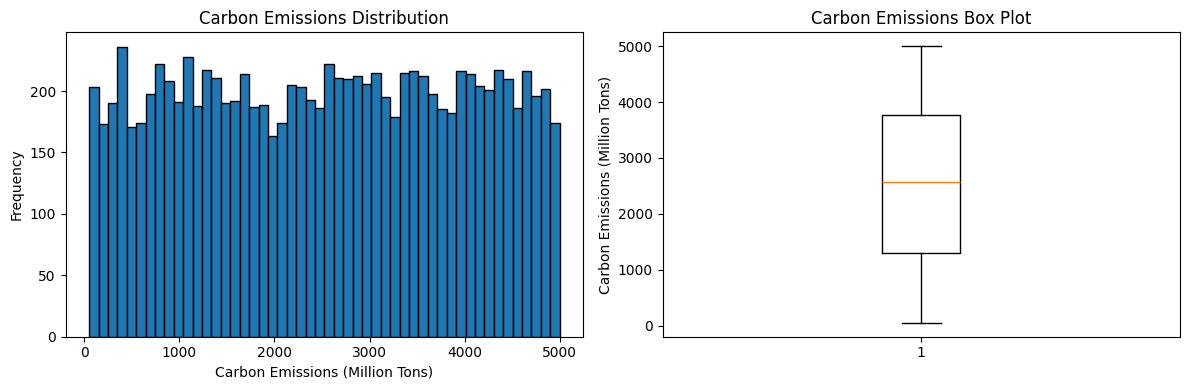

In [ ]:
# Target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df[target], bins=50, edgecolor='black')
plt.title('Carbon Emissions Distribution')
plt.xlabel('Carbon Emissions (Million Tons)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df[target])
plt.title('Carbon Emissions Box Plot')
plt.ylabel('Carbon Emissions (Million Tons)')

plt.tight_layout()
plt.show()

### Correlation Analysis

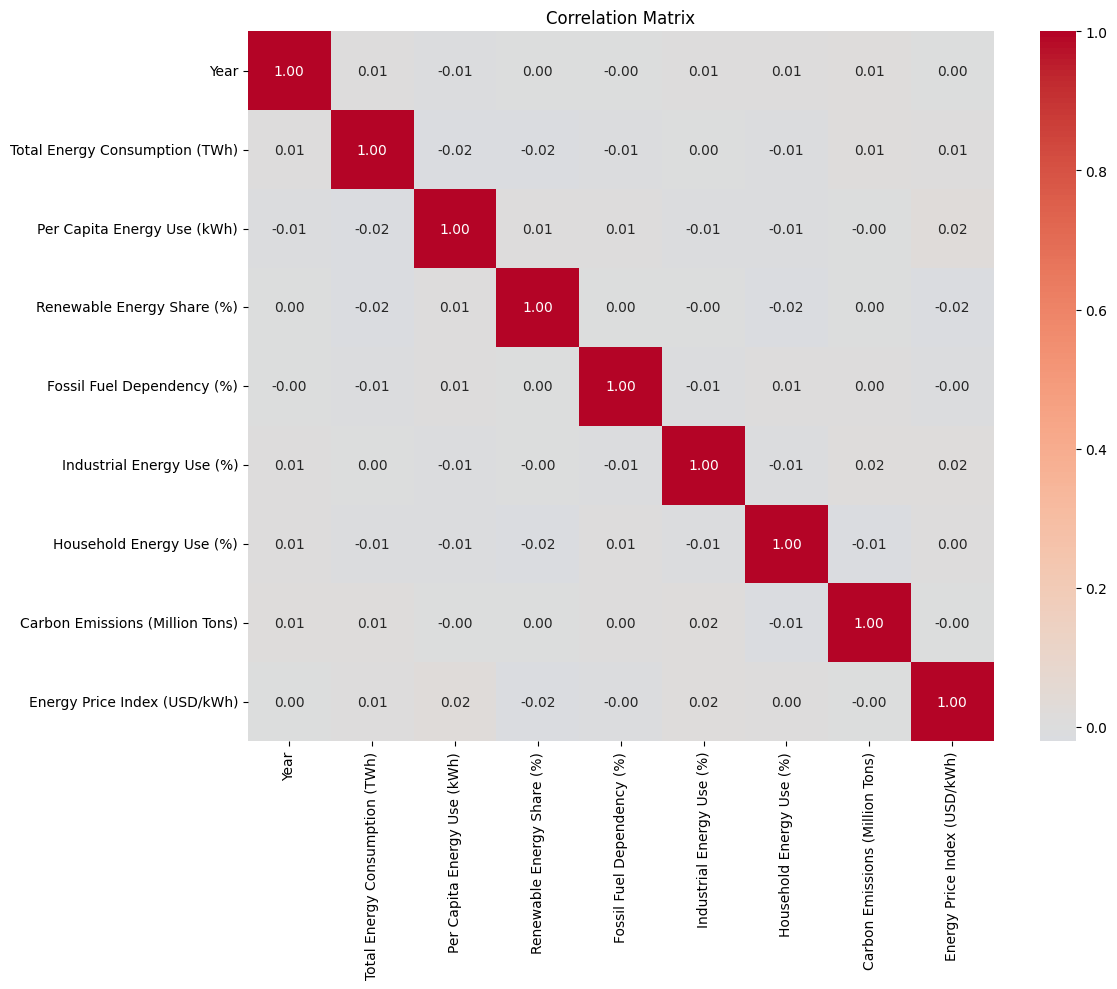

In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# Correlations with target
print("Correlation with Carbon Emissions:")
target_corr = correlation[target].sort_values(ascending=False)
print(target_corr)

Correlation with Carbon Emissions:
Carbon Emissions (Million Tons)    1.000000
Industrial Energy Use (%)          0.017964
Total Energy Consumption (TWh)     0.013643
Year                               0.013437
Fossil Fuel Dependency (%)         0.004444
Renewable Energy Share (%)         0.001108
Per Capita Energy Use (kWh)       -0.002527
Energy Price Index (USD/kWh)      -0.002696
Household Energy Use (%)          -0.013996
Name: Carbon Emissions (Million Tons), dtype: float64


### Scatter Plots - Top Features

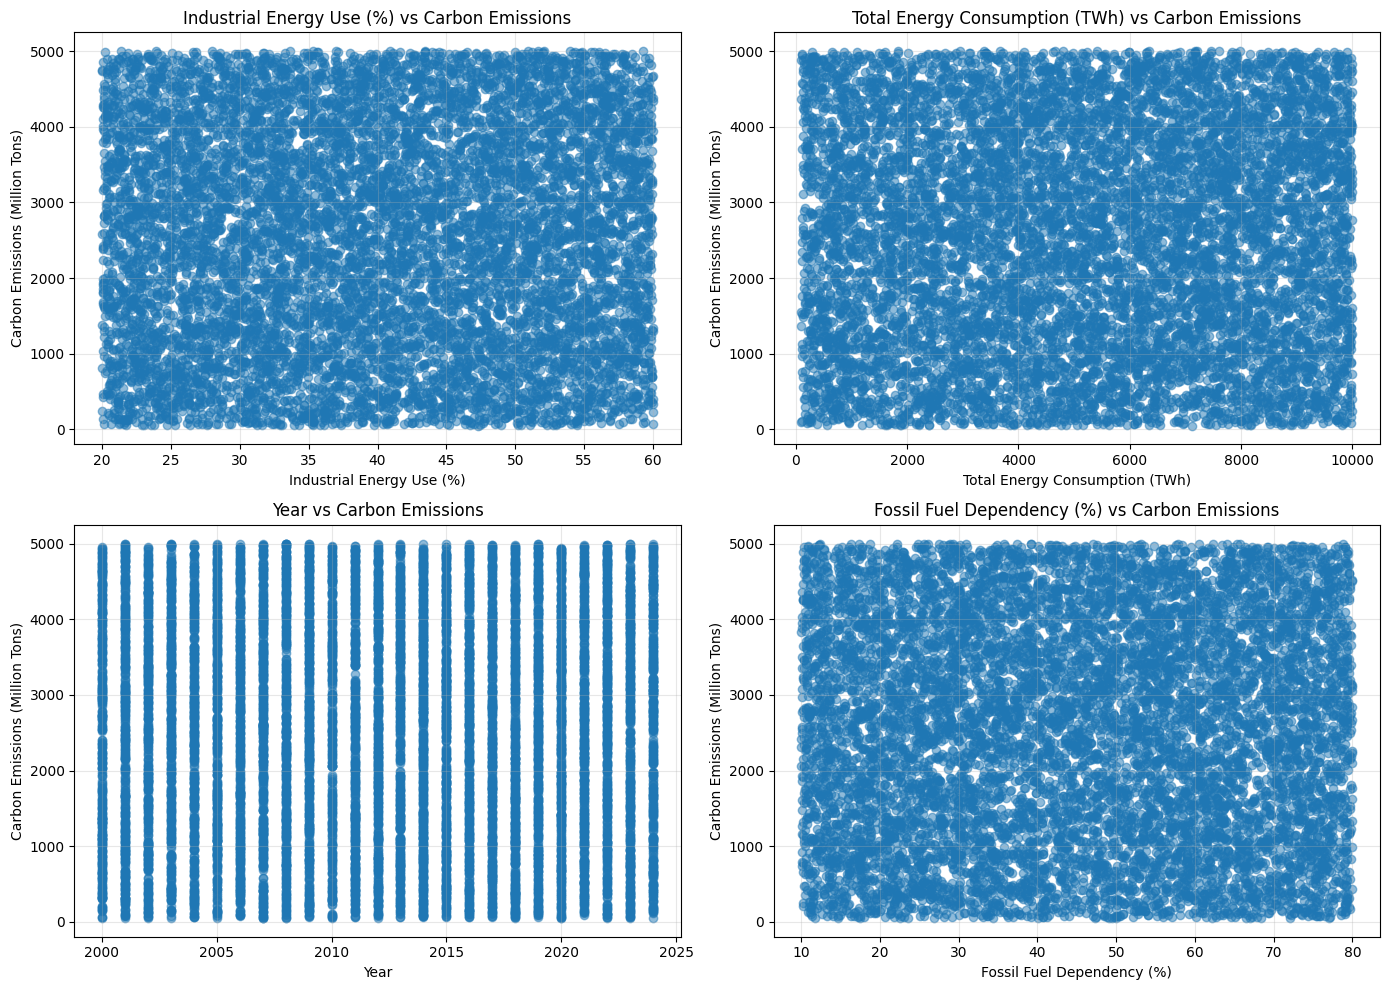

In [ ]:
# Top 4 correlated features
top_features = target_corr.drop(target).head(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df[feature], df[target], alpha=0.5)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel(target)
    axes[idx].set_title(f'{feature} vs Carbon Emissions')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Data Preprocessing

In [ ]:
# Create copy
df_clean = df.copy()

# Encode Country column
le = LabelEncoder()
df_clean['Country_Encoded'] = le.fit_transform(df_clean['Country'])

print("Country encoded")

Country encoded


In [ ]:
# Prepare features and target
X = df_clean.drop(['Country', 'Carbon Emissions (Million Tons)'], axis=1)
y = df_clean['Carbon Emissions (Million Tons)']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (10000, 9)
Target: (10000,)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 8000 samples
Test set: 2000 samples


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(" Features scaled")

 Features scaled


## 6. Task 1: Neural Network Model

In [ ]:
# Build Neural Network
nn_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=RANDOM_STATE,
    early_stopping=True
)

print("Neural Network Architecture:")
print("  Input: 9 features")
print("  Hidden Layer 1: 100 neurons (ReLU)")
print("  Hidden Layer 2: 50 neurons (ReLU)")
print("  Hidden Layer 3: 25 neurons (ReLU)")
print("  Output: 1 neuron")

Neural Network Architecture:
  Input: 9 features
  Hidden Layer 1: 100 neurons (ReLU)
  Hidden Layer 2: 50 neurons (ReLU)
  Hidden Layer 3: 25 neurons (ReLU)
  Output: 1 neuron


In [ ]:
# Train
print("Training Neural Network...")
nn_model.fit(X_train_scaled, y_train)
print(f"Training completed in {nn_model.n_iter_} iterations")

Training Neural Network...
Training completed in 129 iterations


In [ ]:
# Evaluate
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred_nn)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
train_r2 = r2_score(y_train, y_train_pred_nn)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred_nn)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
test_r2 = r2_score(y_test, y_test_pred_nn)

print("Neural Network Results:")
print(f"\nTraining Set:")
print(f"  MAE:  {train_mae:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  R²:   {train_r2:.4f}")

print(f"\nTest Set:")
print(f"  MAE:  {test_mae:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R²:   {test_r2:.4f}")

Neural Network Results:

Training Set:
  MAE:  1221.9090
  RMSE: 1417.1353
  R²:   0.0085

Test Set:
  MAE:  1248.5575
  RMSE: 1435.9051
  R²:   -0.0119


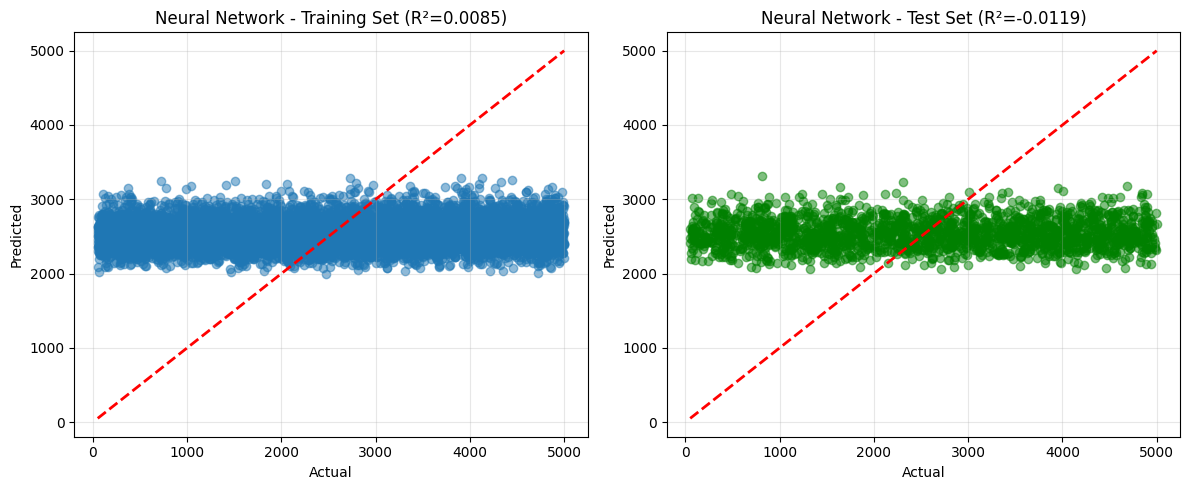

In [ ]:
# Plot predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_nn, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Neural Network - Training Set (R²={train_r2:.4f})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_nn, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Neural Network - Test Set (R²={test_r2:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Task 2: Two Classical ML Models

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=100)
}

print("Models to train:")
for name in models.keys():
    print(f"  - {name}")

Models to train:
  - Linear Regression
  - Random Forest


In [ ]:
# Train and evaluate both models
results = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print('='*60)

    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Training metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    # Test metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\nTraining: MAE={train_mae:.4f}, RMSE={train_rmse:.4f}, R²={train_r2:.4f}")
    print(f"Test:     MAE={test_mae:.4f}, RMSE={test_rmse:.4f}, R²={test_r2:.4f}")

    # Store results
    results[name] = {
        'model': model,
        'train_mae': train_mae,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'test_r2': test_r2,
        'y_test_pred': y_test_pred
    }

print("\n All models trained!")


Training: Linear Regression

Training: MAE=1229.1661, RMSE=1421.9657, R²=0.0017
Test:     MAE=1246.6371, RMSE=1428.8992, R²=-0.0020

Training: Random Forest

Training: MAE=460.8895, RMSE=540.6894, R²=0.8557
Test:     MAE=1269.0363, RMSE=1462.1115, R²=-0.0491

 All models trained!


In [ ]:
# Compare models
comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Train MAE': [results[m]['train_mae'] for m in results],
    'Test MAE': [results[m]['test_mae'] for m in results],
    'Train RMSE': [results[m]['train_rmse'] for m in results],
    'Test RMSE': [results[m]['test_rmse'] for m in results],
    'Train R²': [results[m]['train_r2'] for m in results],
    'Test R²': [results[m]['test_r2'] for m in results]
})

print("\nModel Comparison:")
comparison


Model Comparison:


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R²,Test R²
0,Linear Regression,1229.166125,1246.637112,1421.965700,1428.899199,0.001695,-0.002022
1,Random Forest,460.889529,1269.036296,540.689392,1462.111468,0.855662,-0.049144


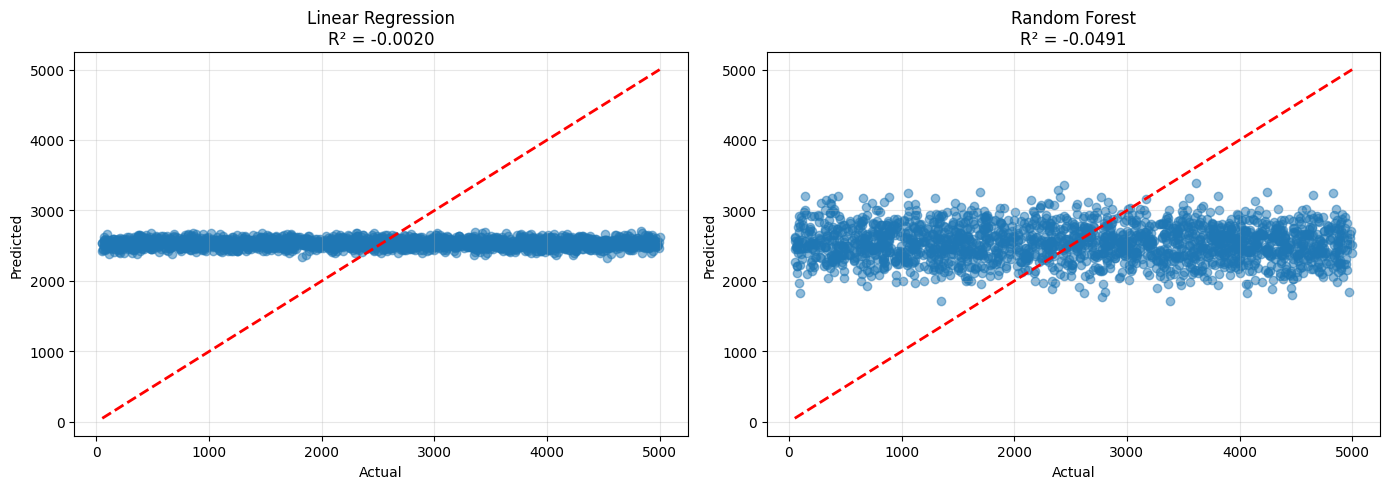

In [ ]:
# Plot predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, name in enumerate(results.keys()):
    axes[idx].scatter(y_test, results[name]['y_test_pred'], alpha=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual')
    axes[idx].set_ylabel('Predicted')
    axes[idx].set_title(f"{name}\nR² = {results[name]['test_r2']:.4f}")
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Task 3: Hyperparameter Optimization

In [ ]:
# Define parameter grids
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10]
    }
}

print("Hyperparameter grids defined")

Hyperparameter grids defined


In [ ]:
# Grid Search for each model
best_models = {}

for name, model in models.items():
    print(f"\nOptimizing: {name}")

    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

    best_models[name] = grid_search.best_estimator_

print("\n Optimization completed!")


Optimizing: Linear Regression
Best parameters: {'fit_intercept': True}
Best CV score: 0.0001

Optimizing: Random Forest
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: -0.0059

 Optimization completed!


## 9. Task 4: Feature Selection

In [ ]:
# Feature selection using RFE
selected_features = {}

for name, model in best_models.items():
    print(f"\nFeature selection for: {name}")

    # Select top 7 features
    rfe = RFE(model, n_features_to_select=7)
    rfe.fit(X_train_scaled, y_train)

    features = X_train_scaled.columns[rfe.support_].tolist()

    print(f"Selected features: {features}")

    selected_features[name] = features

print("\n Feature selection completed!")


Feature selection for: Linear Regression
Selected features: ['Year', 'Total Energy Consumption (TWh)', 'Fossil Fuel Dependency (%)', 'Industrial Energy Use (%)', 'Household Energy Use (%)', 'Energy Price Index (USD/kWh)', 'Country_Encoded']

Feature selection for: Random Forest
Selected features: ['Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 'Industrial Energy Use (%)', 'Household Energy Use (%)', 'Energy Price Index (USD/kWh)']

 Feature selection completed!


## 10. Task 5: Final Models

In [ ]:
# Train final models with selected features
final_results = {}

for name, model in best_models.items():
    print(f"\nFinal training: {name}")

    # Get selected features
    features = selected_features[name]
    X_train_final = X_train_scaled[features]
    X_test_final = X_test_scaled[features]

    # Train
    model.fit(X_train_final, y_train)

    # Predict
    y_test_pred = model.predict(X_test_final)

    # Metrics
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)

    print(f"Features used: {len(features)}")
    print(f"Test MAE:  {mae:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test R²:   {r2:.4f}")

    final_results[name] = {
        'n_features': len(features),
        'test_mae': mae,
        'test_rmse': rmse,
        'test_r2': r2
    }

print("\nFinal training completed!")


Final training: Linear Regression
Features used: 7
Test MAE:  1246.6091
Test RMSE: 1428.8413
Test R²:   -0.0019

Final training: Random Forest
Features used: 7
Test MAE:  1254.1676
Test RMSE: 1437.7890
Test R²:   -0.0145

Final training completed!


In [ ]:
# Final comparison table
final_comparison = pd.DataFrame({
    'Model': list(final_results.keys()),
    'Features': [final_results[m]['n_features'] for m in final_results],
    'MAE': [final_results[m]['test_mae'] for m in final_results],
    'RMSE': [final_results[m]['test_rmse'] for m in final_results],
    'R²': [final_results[m]['test_r2'] for m in final_results]
})

print("\nFinal Model Comparison:")
final_comparison


Final Model Comparison:


,Model,Features,MAE,RMSE,R²
0,Linear Regression,7,1246.609138,1428.841257,-0.001941
1,Random Forest,7,1254.167551,1437.789040,-0.014529


In [ ]:
# Include Neural Network in comparison
all_models = pd.DataFrame([
    {'Model': 'Neural Network', 'Features': 9, 'MAE': test_mae, 'RMSE': test_rmse, 'R²': test_r2},
    {'Model': 'Linear Regression', 'Features': final_results['Linear Regression']['n_features'],
     'MAE': final_results['Linear Regression']['test_mae'],
     'RMSE': final_results['Linear Regression']['test_rmse'],
     'R²': final_results['Linear Regression']['test_r2']},
    {'Model': 'Random Forest', 'Features': final_results['Random Forest']['n_features'],
     'MAE': final_results['Random Forest']['test_mae'],
     'RMSE': final_results['Random Forest']['test_rmse'],
     'R²': final_results['Random Forest']['test_r2']}
])

print("\nAll Models Comparison:")
all_models


All Models Comparison:


,Model,Features,MAE,RMSE,R²
0,Neural Network,9,1269.036296,1462.111468,-0.049144
1,Linear Regression,7,1246.609138,1428.841257,-0.001941
2,Random Forest,7,1254.167551,1437.789040,-0.014529


In [ ]:
# Best model
best_idx = all_models['R²'].idxmax()
best = all_models.loc[best_idx]

print(f"\n Best Model: {best['Model']}")
print(f"   R² Score: {best['R²']:.4f}")
print(f"   RMSE: {best['RMSE']:.4f}")
print(f"   Features: {best['Features']}")


 Best Model: Linear Regression
   R² Score: -0.0019
   RMSE: 1428.8413
   Features: 7
